# imports e downloads

In [ ]:
import pandas as pd
import numpy as np

import torch
from torch import nn
from torch.utils.data import Dataset,DataLoader

import matplotlib.pyplot as plt
import librosa
import librosa.display

from sklearn.model_selection import train_test_split

In [ ]:
X = np.load("/content/drive/MyDrive/synestheticAI/mel_spec_dataset/train_images.npy")
y = np.load("/content/drive/MyDrive/synestheticAI/mel_spec_dataset/train_labels.npy")

In [ ]:
X.shape,y.shape

((616, 257, 257), (616,))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


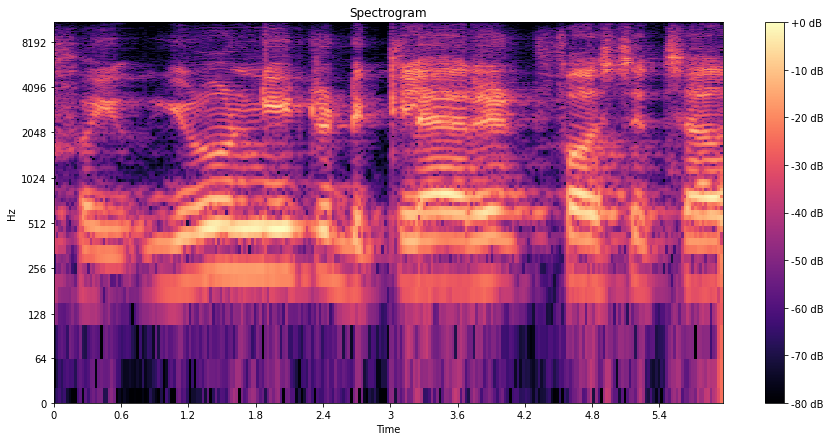

In [ ]:
plt.figure(figsize = (15,7))
librosa.display.specshow(X[34],  x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');
plt.title('Spectrogram');

In [ ]:
X.max(),X.min()

(3.8146973e-06, -80.0)

## dataset com pausas

In [ ]:
X = np.load("/content/drive/MyDrive/synestheticAI/pause_breath_set/train_images.npy")
y = np.load("/content/drive/MyDrive/synestheticAI/pause_breath_set/train_labels.npy")

In [ ]:
X.shape

(3644, 257, 376)

In [ ]:
X = X[:,:,:257]
X.shape

(3644, 257, 257)

# models

## small

In [ ]:
class SmallNet(nn.Module):
    def __init__(self,output_size = 10):
        super(SmallNet,self).__init__()  

         # 257,257
        self.C1 = nn.Conv2d(1, 8, 5, stride=2, padding=1)  
        self.pool1 = torch.nn.MaxPool2d(5,stride = 3)      

        self.C2 = nn.Conv2d(8,16, 5, stride = 3)                 
        self.pool2 = torch.nn.MaxPool2d(3,stride = 2)          
        
        self.C3 = nn.Conv2d(16,8, 3,stride = 2)                    

        # 64

        self.L1 = nn.Linear(32,32)
        self.L2 = nn.Linear(32,16)
        self.L3 = nn.Linear(16,output_size)

        self.softmax = nn.Softmax()
    
    def forward(self,x):
        # convolutional
        
        x = self.C1(x)
        x = self.pool1(x)
        x = nn.ReLU(True)(x)
        
        x = self.C2(x)
        x = self.pool2(x)
        x = nn.ReLU(True)(x)
        
        x = self.C3(x)

        x = nn.Flatten()(x)

        # linear
        x = nn.ReLU(True)(self.L1(x))
        x = nn.ReLU(True)(self.L2(x))
        x = self.L3(x)
        
        # net output
        return self.softmax(x)

In [ ]:
num_classes = 2

In [ ]:
model = SmallNet(num_classes)

x_ex = torch.tensor(X[0].reshape(1,257,257))
print(x_ex.shape)
x_ex = model.C1(x_ex);print(x_ex.shape)
x_ex = model.pool1(x_ex);print(x_ex.shape)
x_ex = model.C2(x_ex);print(x_ex.shape)
x_ex = model.pool2(x_ex);print(x_ex.shape)
x_ex = model.C3(x_ex);print(x_ex.shape)
print(torch.flatten(x_ex).shape)

torch.Size([1, 257, 257])
torch.Size([8, 128, 128])
torch.Size([8, 42, 42])
torch.Size([16, 13, 13])
torch.Size([16, 6, 6])
torch.Size([8, 2, 2])
torch.Size([32])


In [ ]:
SmallNet()

SmallNet(
  (C1): Conv2d(1, 8, kernel_size=(5, 5), stride=(2, 2), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=5, stride=3, padding=0, dilation=1, ceil_mode=False)
  (C2): Conv2d(8, 16, kernel_size=(5, 5), stride=(3, 3))
  (pool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (C3): Conv2d(16, 8, kernel_size=(3, 3), stride=(2, 2))
  (L1): Linear(in_features=32, out_features=32, bias=True)
  (L2): Linear(in_features=32, out_features=16, bias=True)
  (L3): Linear(in_features=16, out_features=10, bias=True)
  (softmax): Softmax(dim=None)
)

## Medium net

In [ ]:
num_classes=  5

In [ ]:
class MediumNet(nn.Module):
    def __init__(self,output_size = 10):
        super(MediumNet,self).__init__()  

         # 257,257
        self.C1 = nn.Conv2d(1, 8, 5, stride=1, padding=1)  
        self.pool1 = torch.nn.MaxPool2d(5,stride = 2)      

        self.C2 = nn.Conv2d(8,16, 5, stride = 3)                 
        self.pool2 = torch.nn.MaxPool2d(3,stride = 2)          
        
        self.C3 = nn.Conv2d(16,32, 3)
        self.pool3 = nn.MaxPool2d(2,stride = 2)        

        self.C4 = nn.Conv2d(32,32, 3)
        

        
        self.L1 = nn.Linear(1568,256)
        self.L2 = nn.Linear(256,64)
        self.L3 = nn.Linear(64,32)
        self.L4 = nn.Linear(32,16)
        self.L5 = nn.Linear(16,output_size)

        self.softmax = nn.Softmax()
    
    def forward(self,x):
        # convolutional
        
        x = self.C1(x)
        x = self.pool1(x)
        x = nn.ReLU(True)(x)
        
        x = self.C2(x)
        x = self.pool2(x)
        x = nn.ReLU(True)(x)
        
        x = self.C3(x)
        x = self.pool3(x)
        x = nn.ReLU(True)(x)

        x = self.C4(x)

        x = nn.Flatten()(x)

        # linear
        x = nn.ReLU(True)(self.L1(x))
        x = nn.ReLU(True)(self.L2(x))
        x = nn.ReLU(True)(self.L3(x))
        x = nn.ReLU(True)(self.L4(x))
        
        x = self.L5(x)
        
        # net output
        return self.softmax(x)

In [ ]:

model = MediumNet(num_classes)

x_ex = torch.tensor(X[0].reshape(1,257,257))
print(x_ex.shape)
x_ex = model.C1(x_ex);print(x_ex.shape)
x_ex = model.pool1(x_ex);print(x_ex.shape)
x_ex = model.C2(x_ex);print(x_ex.shape)
x_ex = model.pool2(x_ex);print(x_ex.shape)
x_ex = model.C3(x_ex);print(x_ex.shape)
x_ex = model.pool3(x_ex);print(x_ex.shape)
x_ex = model.C4(x_ex);print(x_ex.shape)
#x_ex = model.pool4(x_ex);print(x_ex.shape)
print(torch.flatten(x_ex).shape)

torch.Size([1, 257, 257])
torch.Size([8, 255, 255])
torch.Size([8, 126, 126])
torch.Size([16, 41, 41])
torch.Size([16, 20, 20])
torch.Size([32, 18, 18])
torch.Size([32, 9, 9])
torch.Size([32, 7, 7])
torch.Size([1568])


## Big Net

In [ ]:
num_classes=  5

In [ ]:
class BigNet(nn.Module):
    def __init__(self,output_size = 10):
        super(BigNet,self).__init__()
        self.C1 = nn.Conv2d(1, 4, 5, stride=1, padding=1)  
        self.pool1 = torch.nn.MaxPool2d(5,stride = 2)      

        self.C2 = nn.Conv2d(4,8, 5, stride = 1)                 
        self.pool2 = torch.nn.MaxPool2d(5,stride = 2)          
        
        self.C3 = nn.Conv2d(8,16, 3)
        self.pool3 = nn.MaxPool2d(3,padding = 1)        

        self.C4 = nn.Conv2d(16,32, 3)
        self.pool4 = nn.MaxPool2d(3,padding = 1)

        self.C5 = nn.Conv2d(32,32,3)


        self.L1 = nn.Linear(512,256)
        self.L2 = nn.Linear(256,128)
        self.L3 = nn.Linear(128,64)
        self.L4 = nn.Linear(64,32)
        self.L5 = nn.Linear(32,16)
        self.L6 = nn.Linear(16,output_size)

        self.softmax = nn.Softmax()

    def forward(self,x):
        # convolutional
        
        x = self.C1(x)
        x = self.pool1(x)
        x = nn.ReLU(True)(x)
        
        x = self.C2(x)
        x = self.pool2(x)
        x = nn.ReLU(True)(x)
        
        x = self.C3(x)
        x = self.pool3(x)
        x = nn.ReLU(True)(x)

        x = self.C4(x)
        x = self.pool4(x)

        x = self.C5(x)


        x = nn.Flatten()(x)

        # linear
        x = nn.ReLU(True)(self.L1(x))
        x = nn.ReLU(True)(self.L2(x))
        x = nn.ReLU(True)(self.L3(x))
        x = nn.ReLU(True)(self.L4(x))
        x = nn.ReLU(True)(self.L5(x))

        x = self.L6(x)
        
        # net output
        return self.softmax(x)

In [ ]:

model = BigNet(num_classes)

x_ex = torch.tensor(X[0].reshape(1,257,257))
print(x_ex.shape)
x_ex = model.C1(x_ex);print(x_ex.shape)
x_ex = model.pool1(x_ex);print(x_ex.shape)
x_ex = model.C2(x_ex);print(x_ex.shape)
x_ex = model.pool2(x_ex);print(x_ex.shape)
x_ex = model.C3(x_ex);print(x_ex.shape)
x_ex = model.pool3(x_ex);print(x_ex.shape)
x_ex = model.C4(x_ex);print(x_ex.shape)
x_ex = model.pool4(x_ex);print(x_ex.shape)
x_ex = model.C5(x_ex);print(x_ex.shape)

print(torch.flatten(x_ex).shape)

torch.Size([1, 257, 257])
torch.Size([4, 255, 255])
torch.Size([4, 126, 126])
torch.Size([8, 122, 122])
torch.Size([8, 59, 59])
torch.Size([16, 57, 57])
torch.Size([16, 19, 19])
torch.Size([32, 17, 17])
torch.Size([32, 6, 6])
torch.Size([32, 4, 4])
torch.Size([512])


In [ ]:
class BigNet_drop(nn.Module):
    def __init__(self,output_size = 10):
        super(BigNet_drop,self).__init__()
        self.C1 = nn.Conv2d(1, 4, 5, stride=1, padding=1)  
        self.pool1 = torch.nn.MaxPool2d(5,stride = 2)      

        self.C2 = nn.Conv2d(4,8, 5, stride = 1)                 
        self.pool2 = torch.nn.MaxPool2d(5,stride = 2)          
        
        self.C3 = nn.Conv2d(8,16, 3)
        self.pool3 = nn.MaxPool2d(3,padding = 1)        

        self.C4 = nn.Conv2d(16,32, 3)
        self.pool4 = nn.MaxPool2d(3,padding = 1)

        self.C5 = nn.Conv2d(32,32,3)


        self.L1 = nn.Linear(512,256)
        self.L2 = nn.Linear(256,128)
        self.L3 = nn.Linear(128,64)
        self.L4 = nn.Linear(64,32)
        self.L5 = nn.Linear(32,16)
        self.L6 = nn.Linear(16,output_size)

        self.softmax = nn.Softmax()

    def forward(self,x):
        # convolutional
        
        x = self.C1(x)
        x = self.pool1(x)
        x = nn.ReLU(True)(x)
        
        x = self.C2(x)
        x = self.pool2(x)
        x = nn.ReLU(True)(x)
        
        x = self.C3(x)
        x = self.pool3(x)
        x = nn.ReLU(True)(x)

        x = self.C4(x)
        x = self.pool4(x)

        x = self.C5(x)


        x = nn.Flatten()(x)

        # linear
        x = nn.ReLU(True)(self.L1(x)) # 512
        
        x = nn.Dropout(p=0.05)(x)

        x = nn.ReLU(True)(self.L2(x)) # 128
        x = nn.ReLU(True)(self.L3(x)) # 64
        x = nn.ReLU(True)(self.L4(x))
        x = nn.ReLU(True)(self.L5(x))

        x = self.L6(x)
        
        # net output
        return self.softmax(x)

In [ ]:
class BigNet_batch(nn.Module):
    def __init__(self,output_size = 10):
        super(BigNet_batch,self).__init__()
        self.C1 = nn.Conv2d(1, 4, 5, stride=1, padding=1)  
        self.pool1 = torch.nn.MaxPool2d(5,stride = 2)      

        self.C2 = nn.Conv2d(4,8, 5, stride = 1)                 
        self.pool2 = torch.nn.MaxPool2d(5,stride = 2)          
        
        self.C3 = nn.Conv2d(8,16, 3)
        self.pool3 = nn.MaxPool2d(3,padding = 1)        

        self.C4 = nn.Conv2d(16,32, 3)
        self.pool4 = nn.MaxPool2d(3,padding = 1)

        self.C5 = nn.Conv2d(32,32,3)


        self.L1 = nn.Linear(512,256)
        self.L2 = nn.Linear(256,128)
        self.L3 = nn.Linear(128,64)
        self.L4 = nn.Linear(64,32)
        self.L5 = nn.Linear(32,16)
        self.L6 = nn.Linear(16,output_size)

        self.softmax = nn.Softmax()

    def forward(self,x):
        # convolutional
        
        x = self.C1(x)
        x = self.pool1(x)
        x = nn.ReLU(True)(x)
        
        x = self.C2(x)
        x = self.pool2(x)
        x = nn.ReLU(True)(x)
        
        x = self.C3(x)
        x = self.pool3(x)
        x = nn.ReLU(True)(x)

        x = self.C4(x)
        x = self.pool4(x)

        x = self.C5(x)


        x = nn.Flatten()(x)

        # linear
        x = nn.ReLU(True)(self.L1(x)) # 512
        
        x = nn.BatchNorm1d(256)(x)

        x = nn.ReLU(True)(self.L2(x)) # 256
        x = nn.ReLU(True)(self.L3(x)) # 128
        x = nn.ReLU(True)(self.L4(x)) # 64
        x = nn.ReLU(True)(self.L5(x))

        x = self.L6(x)
        
        # net output
        return self.softmax(x)

## VGG

In [ ]:
model_vgg = torch.hub.load('pytorch/vision:v0.10.0', 'vgg11', pretrained=True)

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
Downloading: "https://download.pytorch.org/models/vgg11-8a719046.pth" to /root/.cache/torch/hub/checkpoints/vgg11-8a719046.pth


  0%|          | 0.00/507M [00:00<?, ?B/s]

In [ ]:
x_ex = X[0]
x_ex = np.stack(3*[x_ex])
x_ex = torch.tensor(x_ex.reshape(1,3,257,257))
x_ex.shape

torch.Size([1, 3, 257, 257])

In [ ]:
s = model_vgg(x_ex)
s[0].shape

torch.Size([1000])

In [ ]:
del model_vgg

# dataset

In [ ]:
class Dataset_desc(Dataset):
    def __init__(self,X,y):
        self.X = X
        self.y = y
    def __len__(self):
        return len(self.y)
    def __getitem__(self,idx):
        return self.X[idx],self.y[idx]

# binary classification

## dataset

In [ ]:
num_classes = 2

In [ ]:
indices = (y < num_classes)
X_2 = X[indices]
y_2 = y[indices]

In [ ]:
X.shape,X_2.shape

((3644, 257, 257), (1081, 257, 257))

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_2,y_2)
del X_2 
del y_2

In [ ]:
X_test.shape

(271, 257, 257)

In [ ]:
np.unique(y_train)

array([0, 1])

In [ ]:
import torch.nn.functional as F
F.one_hot(torch.tensor(y_train).long())

tensor([[0, 1],
        [1, 0],
        [0, 1],
        ...,
        [1, 0],
        [0, 1],
        [1, 0]])

In [ ]:
train_dataloader = DataLoader(Dataset_desc(torch.tensor(X_train.reshape(-1,1,257,257 )),
                                           F.one_hot(torch.tensor(y_train).long())
                                           ),
                            batch_size = 64,
                            shuffle=True)
test_dataloader  = DataLoader(Dataset_desc(torch.tensor(X_test.reshape(-1,1,257,257 )),
                                            F.one_hot(torch.tensor(y_test).long()))
                             )

## Small

### treino

In [ ]:
model = SmallNet(num_classes)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.CrossEntropyLoss()
epochs = 150



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch  0 |  loss:  0.6931548714637756
Epoch  1 |  loss:  0.6154809594154358
Epoch  2 |  loss:  0.6701787114143372
Epoch  3 |  loss:  0.6321141123771667
Epoch  4 |  loss:  0.6825894713401794
Epoch  5 |  loss:  0.620482325553894
Epoch  6 |  loss:  0.5315579771995544
Epoch  7 |  loss:  0.4116063714027405
Epoch  8 |  loss:  0.36929523944854736
Epoch  9 |  loss:  0.3481625020503998
Epoch  10 |  loss:  0.39957529306411743
Epoch  11 |  loss:  0.328571081161499
Epoch  12 |  loss:  0.3413493037223816
Epoch  13 |  loss:  0.3418252468109131
Epoch  14 |  loss:  0.31960368156433105
Epoch  15 |  loss:  0.3151814937591553
Epoch  16 |  loss:  0.3160473108291626
Epoch  17 |  loss:  0.31866776943206787
Epoch  18 |  loss:  0.31697553396224976
Epoch  19 |  loss:  0.3184313178062439
Epoch  20 |  loss:  0.31476980447769165
Epoch  21 |  loss:  0.3155951499938965
Epoch  22 |  loss:  0.31967893242836
Epoch  23 |  loss:  0.3150889277458191
Epoch  24 |  loss:  0.3525371849536896
Epoch  25 |  loss:  0.31756827235

Text(0, 0.5, 'cost')

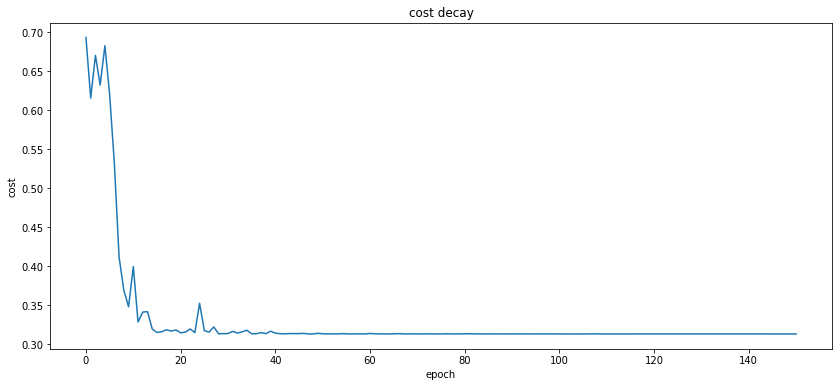

In [ ]:
# loss inicial
for X_batch,y_batch in train_dataloader:
    
    y_pred = model(X_batch.float())
    loss = loss_fn(y_pred, y_batch.float())
    break

loss_list = [loss.item()]
print ("Epoch ",0,"|  loss: ", loss.item())
optimizer.zero_grad() # Zero gradients

for epoch in range(1, epochs+1):
    for X_batch,y_batch in train_dataloader:
        y_pred = model(X_batch.float())            # prediction

        loss = loss_fn(y_pred, y_batch.float())     # loss calculation
        
        optimizer.zero_grad() # Zero gradients
        loss.backward()       # Gradients
        optimizer.step()      # Update

    print ("Epoch ",epoch,"|  loss: ", loss.item())
        
    
    loss_list.append(loss.item())

plt.figure(figsize = (14,6))
plt.title("cost decay")
plt.plot(loss_list)
plt.xlabel("epoch")
plt.ylabel("cost")

### evaluation

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
X_train.shape

(810, 257, 257)

In [ ]:
with torch.no_grad():
    

    y_pred = model(torch.tensor(X_train.reshape(-1,1,257,257)))
    y_pred = y_pred.argmax(axis = 1)


    print("training set")
    print(classification_report(y_train,y_pred))

    print("-"*100)
    

training set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       311
           1       1.00      1.00      1.00       499

    accuracy                           1.00       810
   macro avg       1.00      1.00      1.00       810
weighted avg       1.00      1.00      1.00       810

----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [ ]:
with torch.no_grad():
    
    y_pred = model(torch.tensor(X_test.reshape(-1,1,257,257)))
    y_pred = y_pred.argmax(axis = 1)

    print("test set")
    print(classification_report(y_test,y_pred))

    print("-"*100)
    

test set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00       166

    accuracy                           1.00       271
   macro avg       1.00      1.00      1.00       271
weighted avg       1.00      1.00      1.00       271

----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [ ]:
with torch.no_grad():
        
    y_pred = model(torch.tensor(X_test.reshape(-1,1,257,257)))
    y_pred = y_pred.argmax(axis = 1)

    print("test set")
    print(classification_report(y_test,y_pred))

    print("-"*100)
    

test set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00       166

    accuracy                           1.00       271
   macro avg       1.00      1.00      1.00       271
weighted avg       1.00      1.00      1.00       271

----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


## Medium

In [ ]:
model = MediumNet(num_classes)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.CrossEntropyLoss()
epochs = 50



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch  0 |  loss:  0.6981586217880249
Epoch  1 |  loss:  0.5917613506317139
Epoch  2 |  loss:  0.5554770231246948
Epoch  3 |  loss:  0.47245728969573975
Epoch  4 |  loss:  0.31367620825767517
Epoch  5 |  loss:  0.47005704045295715
Epoch  6 |  loss:  0.3593188524246216
Epoch  7 |  loss:  0.33303868770599365
Epoch  8 |  loss:  0.313339501619339
Epoch  9 |  loss:  0.31337887048721313
Epoch  10 |  loss:  0.3132900297641754
Epoch  11 |  loss:  0.3635947108268738
Epoch  12 |  loss:  0.3272932469844818
Epoch  13 |  loss:  0.32157549262046814
Epoch  14 |  loss:  0.33687135577201843
Epoch  15 |  loss:  0.313539981842041
Epoch  16 |  loss:  0.31327900290489197
Epoch  17 |  loss:  0.3132685422897339
Epoch  18 |  loss:  0.3132878839969635
Epoch  19 |  loss:  0.3132631778717041
Epoch  20 |  loss:  0.31327179074287415
Epoch  21 |  loss:  0.31327101588249207
Epoch  22 |  loss:  0.313281774520874
Epoch  23 |  loss:  0.31329670548439026
Epoch  24 |  loss:  0.3133043646812439
Epoch  25 |  loss:  0.31326

Text(0, 0.5, 'cost')

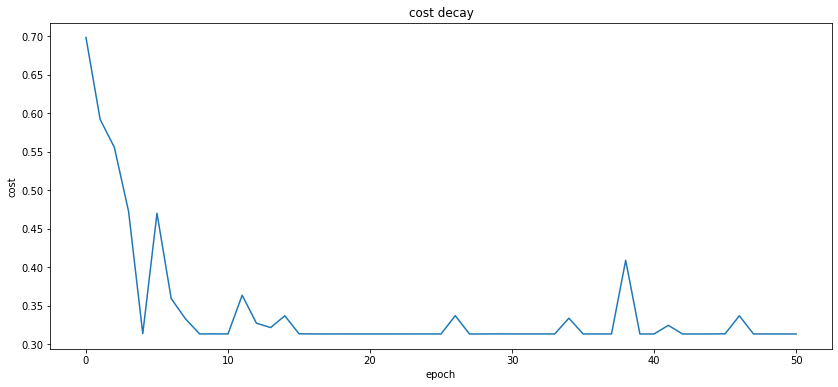

In [ ]:
# loss inicial
for X_batch,y_batch in train_dataloader:
    
    y_pred = model(X_batch.float())
    loss = loss_fn(y_pred, y_batch.float())
    break

loss_list = [loss.item()]
print ("Epoch ",0,"|  loss: ", loss.item())
optimizer.zero_grad() # Zero gradients

for epoch in range(1, epochs+1):
    for X_batch,y_batch in train_dataloader:
        y_pred = model(X_batch.float())            # prediction

        loss = loss_fn(y_pred, y_batch.float())     # loss calculation
        
        optimizer.zero_grad() # Zero gradients
        loss.backward()       # Gradients
        optimizer.step()      # Update

    print ("Epoch ",epoch,"|  loss: ", loss.item())
        
    
    loss_list.append(loss.item())

plt.figure(figsize = (14,6))
plt.title("cost decay")
plt.plot(loss_list)
plt.xlabel("epoch")
plt.ylabel("cost")

### evaluation

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
X_train.shape

(810, 257, 257)

In [ ]:
with torch.no_grad():
    

    y_pred = model(torch.tensor(X_train.reshape(-1,1,257,257)))
    y_pred = y_pred.argmax(axis = 1)


    print("training set")
    print(classification_report(y_train,y_pred))

    print("-"*100)
    

training set
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       303
           1       1.00      0.98      0.99       507

    accuracy                           0.99       810
   macro avg       0.98      0.99      0.99       810
weighted avg       0.99      0.99      0.99       810

----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [ ]:
with torch.no_grad():
    
    y_pred = model(torch.tensor(X_test.reshape(-1,1,257,257)))
    y_pred = y_pred.argmax(axis = 1)

    print("test set")
    print(classification_report(y_test,y_pred))

    print("-"*100)
    

test set
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       113
           1       0.99      0.99      0.99       158

    accuracy                           0.99       271
   macro avg       0.99      0.99      0.99       271
weighted avg       0.99      0.99      0.99       271

----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


## Big

In [ ]:
train_dataloader = DataLoader(Dataset_desc(torch.tensor(X_train.reshape(-1,1,257,257)),
                                           F.one_hot(torch.tensor(y_train).long())
                                           ),
                            batch_size = 512,
                            shuffle=True)
test_dataloader  = DataLoader(Dataset_desc(torch.tensor(X_test.reshape(-1,1,257,257 )),
                                            F.one_hot(torch.tensor(y_test).long()))
                             )

In [ ]:
num_classes = 2

In [ ]:
model = BigNet(num_classes)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.CrossEntropyLoss()
epochs = 50



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch  0 |  loss:  0.3628106117248535
Epoch  1 |  loss:  0.35411375761032104
Epoch  2 |  loss:  0.3661045730113983
Epoch  3 |  loss:  0.34048181772232056
Epoch  4 |  loss:  0.35448071360588074
Epoch  5 |  loss:  0.34382712841033936
Epoch  6 |  loss:  0.34851476550102234
Epoch  7 |  loss:  0.3319314420223236
Epoch  8 |  loss:  0.3349094092845917
Epoch  9 |  loss:  0.3440926969051361
Epoch  10 |  loss:  0.3322196304798126
Epoch  11 |  loss:  0.3277105987071991
Epoch  12 |  loss:  0.3321966230869293
Epoch  13 |  loss:  0.33180898427963257
Epoch  14 |  loss:  0.33648303151130676
Epoch  15 |  loss:  0.34612566232681274
Epoch  16 |  loss:  0.4099428951740265
Epoch  17 |  loss:  0.3817889094352722
Epoch  18 |  loss:  0.32831040024757385
Epoch  19 |  loss:  0.37031126022338867
Epoch  20 |  loss:  0.34289541840553284
Epoch  21 |  loss:  0.3230312764644623
Epoch  22 |  loss:  0.3631092607975006
Epoch  23 |  loss:  0.32318270206451416
Epoch  24 |  loss:  0.3241318464279175
Epoch  25 |  loss:  0.3

Text(0, 0.5, 'cost')

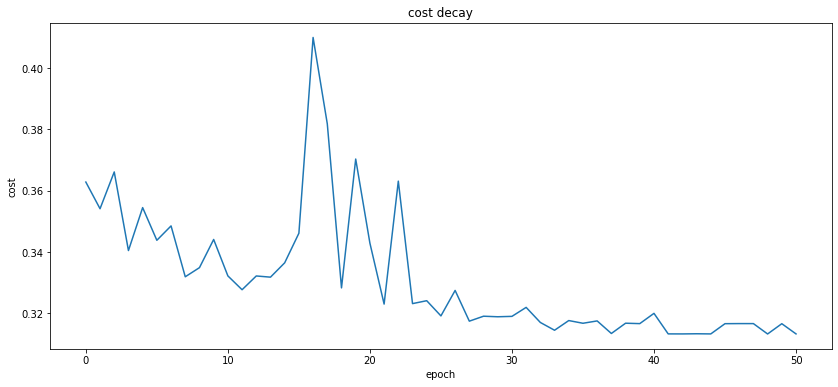

In [ ]:
# loss inicial
for X_batch,y_batch in train_dataloader:
    
    y_pred = model(X_batch.float())
    loss = loss_fn(y_pred, y_batch.float())
    break

loss_list = [loss.item()]
print ("Epoch ",0,"|  loss: ", loss.item())
optimizer.zero_grad() # Zero gradients

for epoch in range(1, epochs+1):
    for X_batch,y_batch in train_dataloader:
        y_pred = model(X_batch.float())            # prediction

        loss = loss_fn(y_pred, y_batch.float())     # loss calculation
        
        optimizer.zero_grad() # Zero gradients
        loss.backward()       # Gradients
        optimizer.step()      # Update

    print ("Epoch ",epoch,"|  loss: ", loss.item())
        
    
    loss_list.append(loss.item())

plt.figure(figsize = (14,6))
plt.title("cost decay")
plt.plot(loss_list)
plt.xlabel("epoch")
plt.ylabel("cost")

### evaluation

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
X_train.shape

(810, 257, 257)

In [ ]:
with torch.no_grad():
    

    y_pred = model(torch.tensor(X_train.reshape(-1,1,257,257)))
    y_pred = y_pred.argmax(axis = 1)


    print("training set")
    print(classification_report(y_train,y_pred))

    print("-"*100)
    

training set
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       297
           1       1.00      0.99      1.00       513

    accuracy                           1.00       810
   macro avg       0.99      1.00      1.00       810
weighted avg       1.00      1.00      1.00       810

----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [ ]:
with torch.no_grad():
    
    y_pred = model(torch.tensor(X_test.reshape(-1,1,257,257)))
    y_pred = y_pred.argmax(axis = 1)

    print("test set")
    print(classification_report(y_test,y_pred))

    print("-"*100)
    

test set
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       119
           1       0.97      1.00      0.99       152

    accuracy                           0.99       271
   macro avg       0.99      0.98      0.98       271
weighted avg       0.99      0.99      0.99       271

----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


# 5 classes

In [ ]:
num_classes = 5

In [ ]:
indices = (y < num_classes)
X_5 = X[indices]
y_5 = y[indices]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_5,y_5)
del X_5
del y_5

In [ ]:
y_train.shape

(1723,)

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4])

In [ ]:
import torch.nn.functional as F
F.one_hot(torch.tensor(y_train).long())

tensor([[0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 1, 0],
        ...,
        [1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0],
        [0, 0, 1, 0, 0]])

In [ ]:
train_dataloader = DataLoader(Dataset_desc(torch.tensor(X_train.reshape(-1,1,257,257)).cuda(),
                                           F.one_hot(torch.tensor(y_train).long().cuda())
                                           ),
                            batch_size = 256,
                            shuffle=True)
test_dataloader  = DataLoader(Dataset_desc(torch.tensor(X_test.reshape(-1,1,257,257 )).cuda(),
                                            F.one_hot(torch.tensor(y_test).long().cuda()))
                             )

## Small

### treino

In [ ]:
model = SmallNet(num_classes)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.CrossEntropyLoss()
epochs = 150



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch  0 |  loss:  1.613168716430664
Epoch  1 |  loss:  1.6059929132461548
Epoch  2 |  loss:  1.5899264812469482
Epoch  3 |  loss:  1.575843334197998
Epoch  4 |  loss:  1.5717737674713135
Epoch  5 |  loss:  1.5799994468688965
Epoch  6 |  loss:  1.5571637153625488
Epoch  7 |  loss:  1.5646237134933472
Epoch  8 |  loss:  1.4919601678848267
Epoch  9 |  loss:  1.4794254302978516
Epoch  10 |  loss:  1.471807837486267
Epoch  11 |  loss:  1.4296530485153198
Epoch  12 |  loss:  1.418440818786621
Epoch  13 |  loss:  1.3678615093231201
Epoch  14 |  loss:  1.3985041379928589
Epoch  15 |  loss:  1.3816931247711182
Epoch  16 |  loss:  1.337408423423767
Epoch  17 |  loss:  1.3219870328903198
Epoch  18 |  loss:  1.3562686443328857
Epoch  19 |  loss:  1.3147776126861572
Epoch  20 |  loss:  1.2488130331039429
Epoch  21 |  loss:  1.2805919647216797
Epoch  22 |  loss:  1.2803432941436768
Epoch  23 |  loss:  1.3107484579086304
Epoch  24 |  loss:  1.3014271259307861
Epoch  25 |  loss:  1.275101661682129
Ep

Text(0, 0.5, 'cost')

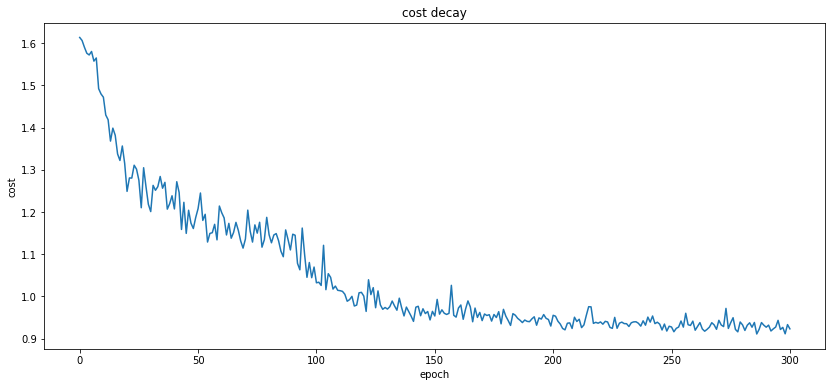

In [ ]:
# loss inicial
for X_batch,y_batch in train_dataloader:
    
    y_pred = model(X_batch.float())
    loss = loss_fn(y_pred, y_batch.float())
    break

loss_list = [loss.item()]
print ("Epoch ",0,"|  loss: ", loss.item())
optimizer.zero_grad() # Zero gradients

for epoch in range(1, epochs+1):
    for X_batch,y_batch in train_dataloader:
        y_pred = model(X_batch.float())            # prediction

        loss = loss_fn(y_pred, y_batch.float())     # loss calculation
        
        optimizer.zero_grad() # Zero gradients
        loss.backward()       # Gradients
        optimizer.step()      # Update

    print ("Epoch ",epoch,"|  loss: ", loss.item())
        
    
    loss_list.append(loss.item())

plt.figure(figsize = (14,6))
plt.title("cost decay")
plt.plot(loss_list)
plt.xlabel("epoch")
plt.ylabel("cost")

### evaluation

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
X_train.shape

(1723, 257, 257)

In [ ]:
with torch.no_grad():
    

    y_pred = model(torch.tensor(X_train.reshape(-1,1,257,257)))
    y_pred = y_pred.argmax(axis = 1)


    print("training set")
    print(classification_report(y_train,y_pred))

    print("-"*100)
    

training set
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       311
           1       0.98      0.98      0.98       487
           2       0.97      0.97      0.97       326
           3       1.00      0.99      0.99       253
           4       0.98      0.97      0.98       346

    accuracy                           0.98      1723
   macro avg       0.98      0.98      0.98      1723
weighted avg       0.98      0.98      0.98      1723

----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [ ]:
with torch.no_grad():
    
    y_pred = model(torch.tensor(X_test.reshape(-1,1,257,257)))
    y_pred = y_pred.argmax(axis = 1)

    print("test set")
    print(classification_report(y_test,y_pred))

    print("-"*100)
    

test set
              precision    recall  f1-score   support

           0       0.83      0.80      0.82       105
           1       0.90      0.96      0.93       178
           2       0.87      0.74      0.80        88
           3       0.89      0.97      0.93        87
           4       0.86      0.85      0.86       117

    accuracy                           0.87       575
   macro avg       0.87      0.86      0.87       575
weighted avg       0.87      0.87      0.87       575

----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


## Medium

In [ ]:
model = MediumNet(num_classes)
loss_fn = nn.CrossEntropyLoss()

In [ ]:
def treinar(model,opt = None, Nepochs = 50,batch_size = 64, learning_rate = 1e-3,loss_list = [],primeiro_treino =False):
    train_dataloader = DataLoader(Dataset_desc(torch.tensor(X_train.reshape(-1,1,257,257)),
                                           F.one_hot(torch.tensor(y_train).long())
                                           ),
                            batch_size = batch_size,
                            shuffle=True)
    
    
    if primeiro_treino:
        opt = torch.optim.Adam(model.parameters(), lr=learning_rate)
        # loss inicial
        for X_batch,y_batch in train_dataloader:
            
            y_pred = model(X_batch.float())
            loss = loss_fn(y_pred, y_batch.float())
            break

        loss_list = [loss.item()]
        print ("Epoch ",0,"|  loss: ", loss.item())
  
        opt.zero_grad() # Zero gradients

    if opt is None:
        opt = torch.optim.Adam(model.parameters(), lr=learning_rate)


    for epoch in range(1, Nepochs+1):
        for X_batch,y_batch in train_dataloader:
            y_pred = model(X_batch.float())            # prediction

            loss = loss_fn(y_pred, y_batch.float())     # loss calculation
            
            opt.zero_grad() # Zero gradients
            loss.backward()       # Gradients
            opt.step()      # Update

        print ("Epoch ",epoch,"|  loss: ", loss.item())
            
        
        loss_list.append(loss.item())

    plt.figure(figsize = (14,6))
    plt.title("cost decay")
    plt.plot(loss_list)
    plt.xlabel("epoch")
    plt.ylabel("cost")

    

    return loss_list, opt

In [ ]:
len(y_train)

1723

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch  0 |  loss:  1.6151241064071655
Epoch  1 |  loss:  1.5515073537826538
Epoch  2 |  loss:  1.5973680019378662
Epoch  3 |  loss:  1.5737859010696411
Epoch  4 |  loss:  1.5560306310653687
Epoch  5 |  loss:  1.5797823667526245
Epoch  6 |  loss:  1.535438895225525
Epoch  7 |  loss:  1.5039411783218384
Epoch  8 |  loss:  1.4556286334991455
Epoch  9 |  loss:  1.4920159578323364
Epoch  10 |  loss:  1.3621480464935303
Epoch  11 |  loss:  1.2508370876312256
Epoch  12 |  loss:  1.3366121053695679
Epoch  13 |  loss:  1.329088568687439
Epoch  14 |  loss:  1.3184659481048584
Epoch  15 |  loss:  1.2975879907608032
Epoch  16 |  loss:  1.2341419458389282
Epoch  17 |  loss:  1.2254785299301147
Epoch  18 |  loss:  1.229617953300476
Epoch  19 |  loss:  1.1713993549346924
Epoch  20 |  loss:  1.1783415079116821
Epoch  21 |  loss:  1.2169219255447388
Epoch  22 |  loss:  1.2053636312484741
Epoch  23 |  loss:  1.1747559309005737
Epoch  24 |  loss:  1.1687068939208984
Epoch  25 |  loss:  1.1777119636535645

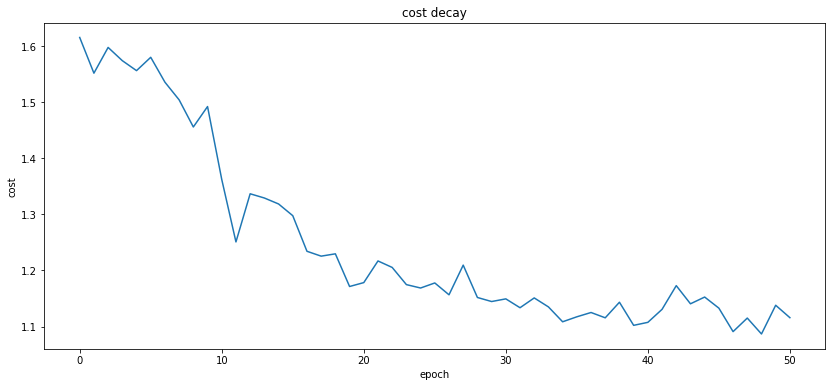

In [ ]:
loss_list, opt = treinar(model,Nepochs = 50,batch_size = 256, learning_rate = 1e-3,loss_list = [],primeiro_treino =True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch  1 |  loss:  1.0986205339431763
Epoch  2 |  loss:  1.1043986082077026
Epoch  3 |  loss:  1.1008350849151611
Epoch  4 |  loss:  1.1141811609268188
Epoch  5 |  loss:  1.0647778511047363
Epoch  6 |  loss:  1.1055508852005005
Epoch  7 |  loss:  1.0820339918136597
Epoch  8 |  loss:  1.084573745727539
Epoch  9 |  loss:  1.1129016876220703
Epoch  10 |  loss:  1.03407621383667
Epoch  11 |  loss:  0.9812966585159302
Epoch  12 |  loss:  1.0103143453598022
Epoch  13 |  loss:  0.9899817705154419
Epoch  14 |  loss:  0.9748793840408325
Epoch  15 |  loss:  0.9503251314163208


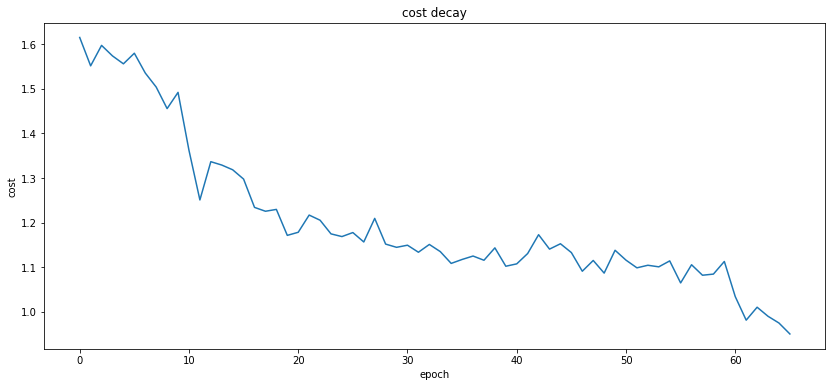

In [ ]:
loss_list, opt = treinar(model, opt, Nepochs = 15,batch_size = 512, learning_rate = 1e-3,loss_list = loss_list,primeiro_treino =False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch  1 |  loss:  0.9539639949798584
Epoch  2 |  loss:  0.9651726484298706
Epoch  3 |  loss:  0.9571718573570251
Epoch  4 |  loss:  0.9673537611961365
Epoch  5 |  loss:  0.9750551581382751
Epoch  6 |  loss:  0.989728569984436
Epoch  7 |  loss:  0.9633049964904785
Epoch  8 |  loss:  0.956788182258606
Epoch  9 |  loss:  0.9360411167144775
Epoch  10 |  loss:  0.963960587978363


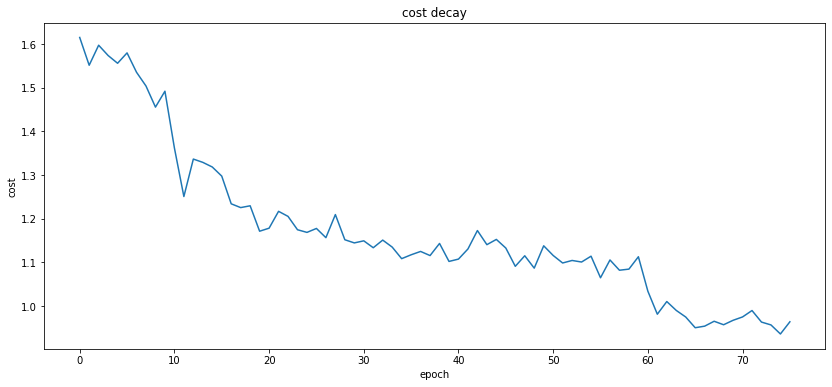

In [ ]:
loss_list, opt = treinar(model, opt, Nepochs = 10, batch_size = 512, learning_rate = 1e-3,loss_list = loss_list,primeiro_treino =False)

In [ ]:
loss_list, opt = treinar(model, opt, Nepochs = 15, batch_size = 512, learning_rate = 1e-3,loss_list = loss_list,primeiro_treino =False)

In [ ]:
loss_list, opt = treinar(model, opt, Nepochs = 25,batch_size = 512, learning_rate = 1e-4,loss_list = loss_list,primeiro_treino =False)

### evaluation

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
X_train.shape

(1723, 257, 257)

In [ ]:
# pode estourar memoria , talvez valha a pena avaliar em batches
with torch.no_grad():
    

    y_pred = model(torch.tensor(X_train.reshape(-1,1,257,257)))
    y_pred = y_pred.argmax(axis = 1)


    print("training set")
    print(classification_report(y_train,y_pred))

    print("-"*100)
    

training set
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       308
           1       0.97      0.98      0.97       511
           2       0.96      0.95      0.95       311
           3       0.96      0.97      0.96       243
           4       0.93      0.95      0.94       350

    accuracy                           0.95      1723
   macro avg       0.95      0.95      0.95      1723
weighted avg       0.95      0.95      0.95      1723

----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [ ]:
with torch.no_grad():
    
    y_pred = model(torch.tensor(X_test.reshape(-1,1,257,257)))
    y_pred = y_pred.argmax(axis = 1)

    print("test set")
    print(classification_report(y_test,y_pred))

    print("-"*100)
    

test set
              precision    recall  f1-score   support

           0       0.94      0.84      0.89       108
           1       0.95      0.92      0.94       154
           2       0.86      0.92      0.89       103
           3       0.94      0.97      0.95        97
           4       0.89      0.94      0.91       113

    accuracy                           0.92       575
   macro avg       0.92      0.92      0.92       575
weighted avg       0.92      0.92      0.92       575

----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


#### save model

In [ ]:
torch.save(model,"/content/drive/MyDrive/projeto deep/models/MediumNet.pt" )

In [ ]:
model_saved = torch.load("/content/drive/MyDrive/projeto deep/models/MediumNet.pt")

In [ ]:
y_pred = model_saved(torch.tensor(X_test.reshape(-1,1,257,257)))
y_pred = y_pred.argmax(axis = 1)

print("test set")
print(classification_report(y_test,y_pred))

print("-"*100)


test set
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       108
           1       0.97      0.89      0.93       154
           2       0.82      0.94      0.87       103
           3       0.95      0.95      0.95        97
           4       0.93      0.90      0.91       113

    accuracy                           0.91       575
   macro avg       0.91      0.92      0.91       575
weighted avg       0.92      0.91      0.92       575

----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [ ]:
del model_saved
del y_pred

## Big

### treino

In [ ]:
num_classes = 5

In [ ]:

model = BigNet(num_classes)

model.to('cuda')
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.CrossEntropyLoss()
epochs = 120



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch  0 |  loss:  1.606050968170166
Epoch  1 |  loss:  1.593772530555725
Epoch  2 |  loss:  1.5930622816085815
Epoch  3 |  loss:  1.5954749584197998
Epoch  4 |  loss:  1.5723451375961304
Epoch  5 |  loss:  1.583828091621399
Epoch  6 |  loss:  1.5559614896774292
Epoch  7 |  loss:  1.5191618204116821
Epoch  8 |  loss:  1.539949655532837
Epoch  9 |  loss:  1.4474116563796997
Epoch  10 |  loss:  1.4739187955856323
Epoch  11 |  loss:  1.3936418294906616
Epoch  12 |  loss:  1.3708287477493286
Epoch  13 |  loss:  1.3735710382461548
Epoch  14 |  loss:  1.3459947109222412
Epoch  15 |  loss:  1.3145595788955688
Epoch  16 |  loss:  1.2672992944717407
Epoch  17 |  loss:  1.2849431037902832
Epoch  18 |  loss:  1.254423975944519
Epoch  19 |  loss:  1.1826210021972656
Epoch  20 |  loss:  1.351274013519287
Epoch  21 |  loss:  1.2048394680023193
Epoch  22 |  loss:  1.2236698865890503
Epoch  23 |  loss:  1.2064061164855957
Epoch  24 |  loss:  1.1494977474212646
Epoch  25 |  loss:  1.1529552936553955
Ep

Text(0, 0.5, 'cost')

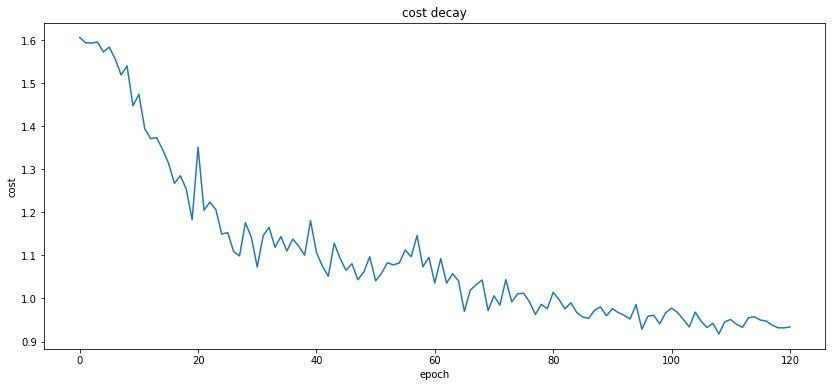

In [ ]:
# loss inicial
for X_batch,y_batch in train_dataloader:
    
    y_pred = model(X_batch.float())
    loss = loss_fn(y_pred, y_batch.float())
    break

loss_list = [loss.item()]
print ("Epoch ",0,"|  loss: ", loss.item())
optimizer.zero_grad() # Zero gradients

for epoch in range(1, epochs+1):
    for X_batch,y_batch in train_dataloader:
        y_pred = model(X_batch.float())            # prediction

        loss = loss_fn(y_pred, y_batch.float())     # loss calculation
        
        optimizer.zero_grad() # Zero gradients
        loss.backward()       # Gradients
        optimizer.step()      # Update

    print ("Epoch ",epoch,"|  loss: ", loss.item())
        
    
    loss_list.append(loss.item())

plt.figure(figsize = (14,6))
plt.title("cost decay")
plt.plot(loss_list)
plt.xlabel("epoch")
plt.ylabel("cost")

### evaluation

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
X_train.shape

(1723, 257, 257)

In [ ]:
with torch.no_grad():
    

    y_pred = model(torch.tensor(X_train.reshape(-1,1,257,257)).cuda())
    y_pred = y_pred.cpu().detach().numpy().argmax(axis = 1)


    print("training set")
    print(classification_report(y_train,y_pred))

    print("-"*100)
    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


training set
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       326
           1       0.97      0.99      0.98       481
           2       0.97      0.95      0.96       310
           3       0.99      1.00      0.99       256
           4       0.97      0.95      0.96       350

    accuracy                           0.97      1723
   macro avg       0.97      0.97      0.97      1723
weighted avg       0.97      0.97      0.97      1723

----------------------------------------------------------------------------------------------------


In [ ]:
with torch.no_grad():
    
    y_pred = model(torch.tensor(X_test.reshape(-1,1,257,257)).cuda())
    y_pred = y_pred.cpu().detach().numpy().argmax(axis = 1)

    print("test set")
    print(classification_report(y_test,y_pred))

    print("-"*100)
    

test set
              precision    recall  f1-score   support

           0       0.72      0.78      0.75        90
           1       0.94      0.90      0.92       184
           2       0.79      0.86      0.82       104
           3       0.91      0.94      0.92        84
           4       0.81      0.73      0.77       113

    accuracy                           0.85       575
   macro avg       0.83      0.84      0.84       575
weighted avg       0.85      0.85      0.85       575

----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


## BigNet drop

### treino

In [ ]:
num_classes = 5

In [ ]:
model = BigNet_drop(num_classes)

model.to('cuda')
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.CrossEntropyLoss()
epochs = 150



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:64: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch  0 |  loss:  1.6108776330947876
Epoch  1 |  loss:  1.6003451347351074
Epoch  2 |  loss:  1.589573860168457
Epoch  3 |  loss:  1.5868858098983765
Epoch  4 |  loss:  1.5862960815429688
Epoch  5 |  loss:  1.589321255683899
Epoch  6 |  loss:  1.5823472738265991
Epoch  7 |  loss:  1.5580692291259766
Epoch  8 |  loss:  1.5880581140518188
Epoch  9 |  loss:  1.5893434286117554
Epoch  10 |  loss:  1.5934243202209473
Epoch  11 |  loss:  1.5649421215057373
Epoch  12 |  loss:  1.578439474105835
Epoch  13 |  loss:  1.5762076377868652
Epoch  14 |  loss:  1.5721536874771118
Epoch  15 |  loss:  1.5704299211502075
Epoch  16 |  loss:  1.514588713645935
Epoch  17 |  loss:  1.5065836906433105
Epoch  18 |  loss:  1.504801869392395
Epoch  19 |  loss:  1.3994979858398438
Epoch  20 |  loss:  1.3922079801559448
Epoch  21 |  loss:  1.4226306676864624
Epoch  22 |  loss:  1.3758653402328491
Epoch  23 |  loss:  1.3865286111831665
Epoch  24 |  loss:  1.3957594633102417
Epoch  25 |  loss:  1.3309873342514038
E

Text(0, 0.5, 'cost')

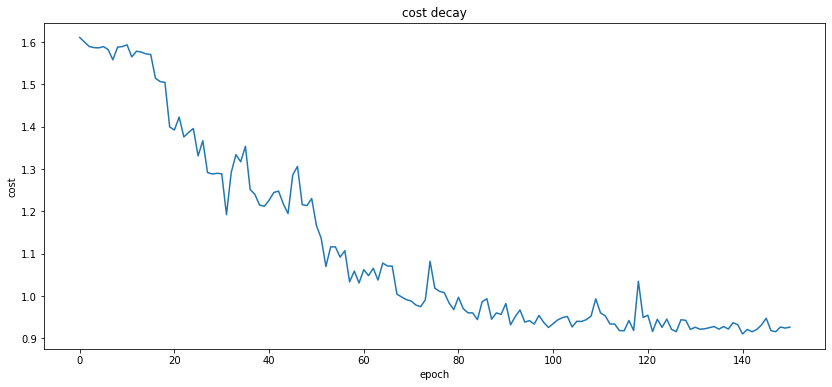

In [ ]:
# loss inicial
for X_batch,y_batch in train_dataloader:
    
    y_pred = model(X_batch.float())
    loss = loss_fn(y_pred, y_batch.float())
    break

loss_list = [loss.item()]
print ("Epoch ",0,"|  loss: ", loss.item())
optimizer.zero_grad() # Zero gradients

for epoch in range(1, epochs+1):
    for X_batch,y_batch in train_dataloader:
        y_pred = model(X_batch.float())            # prediction

        loss = loss_fn(y_pred, y_batch.float())     # loss calculation
        
        optimizer.zero_grad() # Zero gradients
        loss.backward()       # Gradients
        optimizer.step()      # Update

    print ("Epoch ",epoch,"|  loss: ", loss.item())
        
    
    loss_list.append(loss.item())

plt.figure(figsize = (14,6))
plt.title("cost decay")
plt.plot(loss_list)
plt.xlabel("epoch")
plt.ylabel("cost")

### evaluation

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
X_train.shape

(1723, 257, 257)

In [ ]:
with torch.no_grad():
    

    y_pred = model(torch.tensor(X_train.reshape(-1,1,257,257)).cuda())
    y_pred = y_pred.cpu().detach().numpy().argmax(axis = 1)


    print("training set")
    print(classification_report(y_train,y_pred))

    print("-"*100)
    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:64: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


training set
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       326
           1       0.99      0.99      0.99       481
           2       0.98      0.97      0.98       310
           3       0.98      0.98      0.98       256
           4       0.97      0.98      0.97       350

    accuracy                           0.98      1723
   macro avg       0.98      0.98      0.98      1723
weighted avg       0.98      0.98      0.98      1723

----------------------------------------------------------------------------------------------------


In [ ]:
with torch.no_grad():
    
    y_pred = model(torch.tensor(X_test.reshape(-1,1,257,257)).cuda())
    y_pred = y_pred.cpu().detach().numpy().argmax(axis = 1)

    print("test set")
    print(classification_report(y_test,y_pred))

    print("-"*100)
    

test set
              precision    recall  f1-score   support

           0       0.70      0.56      0.62        90
           1       0.90      0.94      0.92       184
           2       0.85      0.79      0.82       104
           3       0.83      0.95      0.89        84
           4       0.72      0.76      0.74       113

    accuracy                           0.82       575
   macro avg       0.80      0.80      0.80       575
weighted avg       0.82      0.82      0.81       575

----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:64: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


## Batch Norm

### treino

In [ ]:
num_classes = 5

In [ ]:
train_dataloader = DataLoader(Dataset_desc(torch.tensor(X_train.reshape(-1,1,257,257)),
                                           F.one_hot(torch.tensor(y_train).long())
                                           ),
                            batch_size = 256,
                            shuffle=True)
test_dataloader  = DataLoader(Dataset_desc(torch.tensor(X_test.reshape(-1,1,257,257 )),
                                            F.one_hot(torch.tensor(y_test).long()))
                             )

In [ ]:
model = BigNet_batch(num_classes)

model.to('cpu')
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.CrossEntropyLoss()
epochs = 50



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:64: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch  0 |  loss:  1.6104451417922974
Epoch  1 |  loss:  1.605513095855713
Epoch  2 |  loss:  1.593361735343933
Epoch  3 |  loss:  1.539698839187622
Epoch  4 |  loss:  1.4165349006652832
Epoch  5 |  loss:  1.369248867034912
Epoch  6 |  loss:  1.3148521184921265
Epoch  7 |  loss:  1.2241491079330444
Epoch  8 |  loss:  1.2540274858474731
Epoch  9 |  loss:  1.1754264831542969
Epoch  10 |  loss:  1.190875768661499
Epoch  11 |  loss:  1.1673191785812378
Epoch  12 |  loss:  1.1566929817199707
Epoch  13 |  loss:  1.0836620330810547
Epoch  14 |  loss:  0.9985278844833374
Epoch  15 |  loss:  0.9788411855697632
Epoch  16 |  loss:  0.9695374965667725
Epoch  17 |  loss:  0.9493147730827332
Epoch  18 |  loss:  0.9334836602210999
Epoch  19 |  loss:  0.9225174784660339
Epoch  20 |  loss:  0.9162343740463257
Epoch  21 |  loss:  0.9323137998580933
Epoch  22 |  loss:  0.9133443832397461
Epoch  23 |  loss:  0.9113703370094299
Epoch  24 |  loss:  0.9344643354415894
Epoch  25 |  loss:  0.9119403958320618
E

Text(0, 0.5, 'cost')

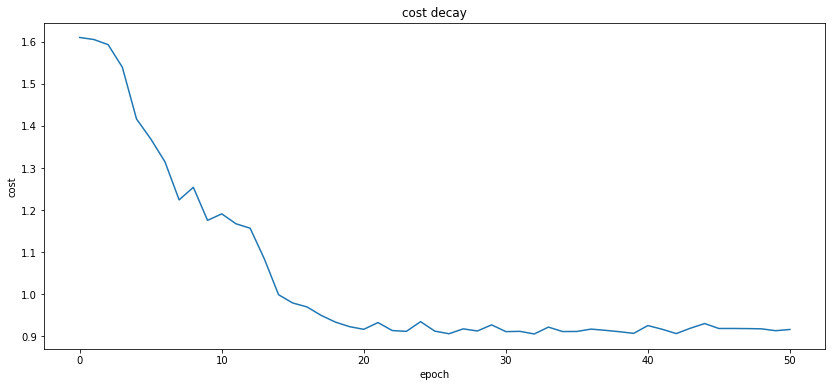

In [ ]:
# loss inicial
for X_batch,y_batch in train_dataloader:
    
    y_pred = model(X_batch.float())
    loss = loss_fn(y_pred, y_batch.float())
    break

loss_list = [loss.item()]
print ("Epoch ",0,"|  loss: ", loss.item())
optimizer.zero_grad() # Zero gradients

for epoch in range(1, epochs+1):
    for X_batch,y_batch in train_dataloader:
        y_pred = model(X_batch.float())            # prediction

        loss = loss_fn(y_pred, y_batch.float())     # loss calculation
        
        optimizer.zero_grad() # Zero gradients
        loss.backward()       # Gradients
        optimizer.step()      # Update

    print ("Epoch ",epoch,"|  loss: ", loss.item())
        
    
    loss_list.append(loss.item())

plt.figure(figsize = (14,6))
plt.title("cost decay")
plt.plot(loss_list)
plt.xlabel("epoch")
plt.ylabel("cost")

### evaluation

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
X_train.shape

(1723, 257, 257)

In [ ]:
with torch.no_grad():
    preds = []
    y_true = []
    for X_batch,y_batch in train_dataloader:
        y_pred = model(X_batch.float())            # prediction

        y_pred = y_pred.argmax(axis = 1)
        preds.append(y_pred.detach().numpy())
        y_true.append(y_batch.argmax(axis = 1).detach().numpy())

    y_pred = np.hstack(preds)
    y_true = np.hstack(y_true)
    
    print("training set")
    print(classification_report(y_true,y_pred))

    print("-"*100)
    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:64: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


training set
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       303
           1       1.00      1.00      1.00       505
           2       1.00      1.00      1.00       305
           3       1.00      1.00      1.00       245
           4       0.99      0.99      0.99       365

    accuracy                           1.00      1723
   macro avg       1.00      1.00      1.00      1723
weighted avg       1.00      1.00      1.00      1723

----------------------------------------------------------------------------------------------------


In [ ]:
y_true[0].shape

(5,)

In [ ]:
X_batch.shape

torch.Size([1, 1, 257, 257])

In [ ]:
test_dataloader  = DataLoader(Dataset_desc(torch.tensor(X_test.reshape(-1,1,257,257 )),
                                            F.one_hot(torch.tensor(y_test).long())),
                             batch_size = len(y_test))
with torch.no_grad():
    preds = []
    y_true = []
    for X_batch,y_batch in test_dataloader:
        y_pred = model(X_batch.float())            # prediction

        y_pred = y_pred.argmax(axis = 1)
        preds.append(y_pred.detach().numpy())
        y_true.append(y_batch.argmax(axis = 1).detach().numpy())

    y_pred = np.hstack(preds)
    y_true = np.hstack(y_true)
    
    print("testing set")
    print(classification_report(y_true,y_pred))

    print("-"*100)
    

testing set
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       113
           1       0.95      0.97      0.96       160
           2       0.95      0.93      0.94       109
           3       0.96      0.93      0.94        95
           4       0.88      0.97      0.92        98

    accuracy                           0.93       575
   macro avg       0.93      0.93      0.93       575
weighted avg       0.93      0.93      0.93       575

----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:64: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


# 10 classes

## preparando dados

In [ ]:
num_classes = 10

In [ ]:
X = np.load("/content/drive/MyDrive/synestheticAI/pause_breath_set/train_images.npy")
y = np.load("/content/drive/MyDrive/synestheticAI/pause_breath_set/train_labels.npy")

In [ ]:
X = X[:,:,:257]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y)
del X
del y

In [ ]:
X_train.shape

(2733, 257, 257)

In [ ]:
np.unique(y_train, return_counts =  1)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([304, 489, 305, 251, 350, 149, 132, 271, 266, 216]))

In [ ]:
import torch.nn.functional as F
F.one_hot(torch.tensor(y_train).long())

tensor([[0, 0, 0,  ..., 0, 0, 1],
        [0, 1, 0,  ..., 0, 0, 0],
        [0, 0, 1,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 1, 0, 0],
        [0, 0, 0,  ..., 1, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0]])

In [ ]:
train_dataloader = DataLoader(Dataset_desc(torch.tensor(X_train.reshape(-1,1,257,257 )),
                                           F.one_hot(torch.tensor(y_train).long())
                                           ),
                            batch_size = 512,
                            shuffle=True)
test_dataloader  = DataLoader(Dataset_desc(torch.tensor(X_test.reshape(-1,1,257,257 )),
                                            F.one_hot(torch.tensor(y_test).long()))
                             )

## SmallNet

In [ ]:
model = SmallNet(num_classes)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.CrossEntropyLoss()
epochs = 150



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch  0 |  loss:  2.306781768798828
Epoch  1 |  loss:  2.254411220550537
Epoch  2 |  loss:  2.2358837127685547
Epoch  3 |  loss:  2.2641170024871826
Epoch  4 |  loss:  2.2620818614959717
Epoch  5 |  loss:  2.278223991394043
Epoch  6 |  loss:  2.283377170562744
Epoch  7 |  loss:  2.278179168701172
Epoch  8 |  loss:  2.27357816696167
Epoch  9 |  loss:  2.2332160472869873
Epoch  10 |  loss:  2.268098831176758
Epoch  11 |  loss:  2.227494716644287
Epoch  12 |  loss:  2.2414941787719727
Epoch  13 |  loss:  2.248745918273926
Epoch  14 |  loss:  2.1290783882141113
Epoch  15 |  loss:  2.2187626361846924
Epoch  16 |  loss:  2.1646203994750977
Epoch  17 |  loss:  2.126694917678833
Epoch  18 |  loss:  2.0715701580047607
Epoch  19 |  loss:  2.155372142791748
Epoch  20 |  loss:  2.1161515712738037
Epoch  21 |  loss:  2.2020320892333984
Epoch  22 |  loss:  2.1592273712158203
Epoch  23 |  loss:  2.0893070697784424
Epoch  24 |  loss:  2.0421369075775146
Epoch  25 |  loss:  2.140270709991455
Epoch  26

Text(0, 0.5, 'cost')

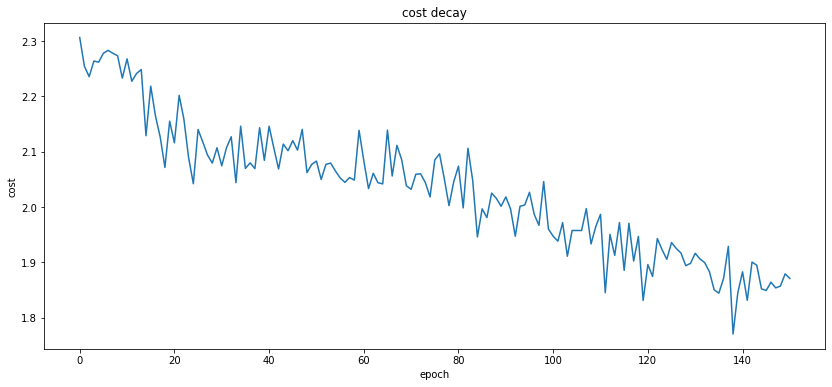

In [ ]:
# loss inicial
for X_batch,y_batch in train_dataloader:
    
    y_pred = model(X_batch.float())
    loss = loss_fn(y_pred, y_batch.float())
    break

loss_list = [loss.item()]
print ("Epoch ",0,"|  loss: ", loss.item())
optimizer.zero_grad() # Zero gradients

for epoch in range(1, epochs+1):
    for X_batch,y_batch in train_dataloader:
        y_pred = model(X_batch.float())            # prediction

        loss = loss_fn(y_pred, y_batch.float())     # loss calculation
        
        optimizer.zero_grad() # Zero gradients
        loss.backward()       # Gradients
        optimizer.step()      # Update

    print ("Epoch ",epoch,"|  loss: ", loss.item())
        
    
    loss_list.append(loss.item())

plt.figure(figsize = (14,6))
plt.title("cost decay")
plt.plot(loss_list)
plt.xlabel("epoch")
plt.ylabel("cost")

### evaluation

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
with torch.no_grad():
    preds = []
    for X_sample,y_sample in Dataset_desc(torch.tensor(X_train.reshape(-1,1,257,257)),y_train):
       
        y_pred = model(X_sample.reshape(-1,1,257,257).float())
        y_pred = y_pred.argmax(axis = 1)
        preds.append(y_pred.detach().numpy())
   
    y_pred = np.array(preds)
    
    print(y_pred)
    print("training set")
    print(classification_report(y_train,y_pred))

    print("-"*100)
    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


[[0]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]
training set
              precision    recall  f1-score   support

           0       0.59      0.84      0.69       318
           1       0.50      1.00      0.67       504
           2       0.00      0.00      0.00       303
           3       0.57      0.95      0.71       251
           4       0.68      0.87      0.77       349
           5       0.80      0.90      0.84       145
           6       0.00      0.00      0.00       120
           7       0.00      0.00      0.00       257
           8       0.91      0.91      0.91       252
           9       0.00      0.00      0.00       234

    accuracy                           0.61      2733
   macro avg       0.40      0.55      0.46      2733
weighted avg       0.43      0.61      0.50      2733

----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
with torch.no_grad():
    
    y_pred = model(torch.tensor(X_test.reshape(-1,1,257,257)))
    y_pred = y_pred.argmax(axis = 1)

    print("test set")
    print(classification_report(y_test,y_pred))

    print("-"*100)
    

test set
              precision    recall  f1-score   support

           0       0.48      0.72      0.58        98
           1       0.49      0.98      0.65       161
           2       0.00      0.00      0.00       111
           3       0.59      0.94      0.72        89
           4       0.59      0.76      0.66       114
           5       0.70      0.81      0.75        48
           6       0.00      0.00      0.00        41
           7       0.00      0.00      0.00        94
           8       0.85      0.84      0.84        93
           9       0.00      0.00      0.00        62

    accuracy                           0.57       911
   macro avg       0.37      0.51      0.42       911
weighted avg       0.39      0.57      0.46       911

----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted s

## MediumNet

In [ ]:
model = MediumNet(num_classes)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.CrossEntropyLoss()
epochs = 200



In [ ]:
# loss inicial
for X_batch,y_batch in train_dataloader:
    
    y_pred = model(X_batch.float())
    loss = loss_fn(y_pred, y_batch.float())
    break

loss_list = [loss.item()]
print ("Epoch ",0,"|  loss: ", loss.item())
optimizer.zero_grad() # Zero gradients

for epoch in range(1, epochs+1):
    for X_batch,y_batch in train_dataloader:
        y_pred = model(X_batch.float())            # prediction

        loss = loss_fn(y_pred, y_batch.float())     # loss calculation
        
        optimizer.zero_grad() # Zero gradients
        loss.backward()       # Gradients
        optimizer.step()      # Update

    print ("Epoch ",epoch,"|  loss: ", loss.item())
        
    
    loss_list.append(loss.item())

plt.figure(figsize = (14,6))
plt.title("cost decay")
plt.plot(loss_list)
plt.xlabel("epoch")
plt.ylabel("cost")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch  0 |  loss:  2.3030643463134766
Epoch  1 |  loss:  2.233260154724121
Epoch  2 |  loss:  2.2454965114593506
Epoch  3 |  loss:  2.27433443069458
Epoch  4 |  loss:  2.285325765609741
Epoch  5 |  loss:  2.2390527725219727
Epoch  6 |  loss:  2.1615495681762695
Epoch  7 |  loss:  2.1704440116882324


### evaluation

In [ ]:
with torch.no_grad():
    preds = []
    for X_sample,y_sample in Dataset_desc(torch.tensor(X_train.reshape(-1,1,257,257)),y_train):
       
        y_pred = model(X_sample.reshape(-1,1,257,257).float())
        y_pred = y_pred.argmax(axis = 1)
        preds.append(y_pred.detach().numpy())
   
    y_pred = np.array(preds)
    
    print(y_pred)
    print("training set")
    print(classification_report(y_train,y_pred))

    print("-"*100)
    

In [ ]:
with torch.no_grad():
    
    y_pred = model(torch.tensor(X_test.reshape(-1,1,257,257)))
    y_pred = y_pred.argmax(axis = 1)

    print("test set")
    print(classification_report(y_test,y_pred))

    print("-"*100)
    

In [ ]:
torch.save(model,"/content/drive/MyDrive/projeto deep/models/MediumNet10.pt" )

## Big

### treino

In [ ]:
num_classes = 10

In [ ]:
model = BigNet(num_classes)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.CrossEntropyLoss()
epochs = 300

In [ ]:
if torch.cuda.is_available():
    model.to('cuda')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch  0 |  loss:  2.3053901195526123
Epoch  1 |  loss:  2.302665948867798
Epoch  2 |  loss:  2.264348268508911
Epoch  3 |  loss:  2.28871750831604
Epoch  4 |  loss:  2.2502849102020264
Epoch  5 |  loss:  2.2532315254211426
Epoch  6 |  loss:  2.287874698638916
Epoch  7 |  loss:  2.272993803024292
Epoch  8 |  loss:  2.242180824279785
Epoch  9 |  loss:  2.270031690597534
Epoch  10 |  loss:  2.271247148513794
Epoch  11 |  loss:  2.2693121433258057
Epoch  12 |  loss:  2.250978469848633
Epoch  13 |  loss:  2.237440586090088
Epoch  14 |  loss:  2.237137794494629
Epoch  15 |  loss:  2.227428674697876
Epoch  16 |  loss:  2.1712052822113037
Epoch  17 |  loss:  2.146298408508301
Epoch  18 |  loss:  2.1221601963043213
Epoch  19 |  loss:  2.165618419647217
Epoch  20 |  loss:  2.168806552886963
Epoch  21 |  loss:  2.128443956375122
Epoch  22 |  loss:  2.099698305130005
Epoch  23 |  loss:  2.071099281311035
Epoch  24 |  loss:  2.0925567150115967
Epoch  25 |  loss:  2.1857497692108154
Epoch  26 |  lo

Text(0, 0.5, 'cost')

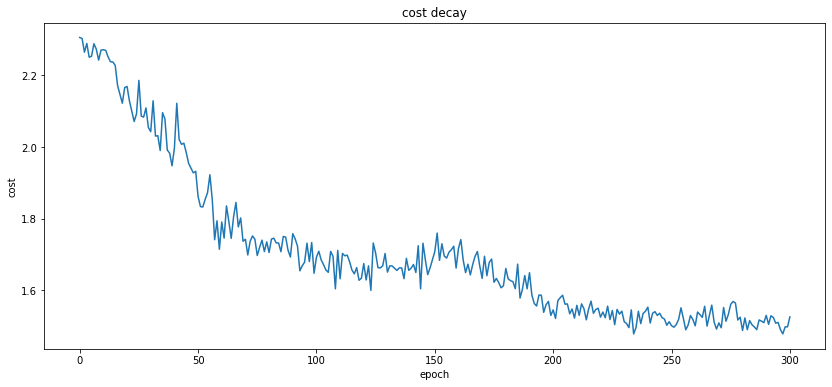

In [ ]:
# loss inicial
for X_batch,y_batch in train_dataloader:
    
    y_pred = model(X_batch.float())
    loss = loss_fn(y_pred, y_batch.float())
    break

loss_list = [loss.item()]
print ("Epoch ",0,"|  loss: ", loss.item())
optimizer.zero_grad() # Zero gradients

for epoch in range(1, epochs+1):
    for X_batch,y_batch in train_dataloader:
        y_pred = model(X_batch.float())            # prediction

        loss = loss_fn(y_pred, y_batch.float())     # loss calculation
        
        optimizer.zero_grad() # Zero gradients
        loss.backward()       # Gradients
        optimizer.step()      # Update

    print ("Epoch ",epoch,"|  loss: ", loss.item())
        
    
    loss_list.append(loss.item())

plt.figure(figsize = (14,6))
plt.title("cost decay")
plt.plot(loss_list)
plt.xlabel("epoch")
plt.ylabel("cost")

### evaluation

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
X_train.shape

(2733, 257, 257)

In [ ]:
with torch.no_grad():
    preds = []

    model.to('cpu')
    for X_sample,y_sample in Dataset_desc(torch.tensor(X_train.reshape(-1,1,257,257)),y_train):
       
        y_pred = model(X_sample.reshape(-1,1,257,257).float())
        y_pred = y_pred.argmax(axis = 1)
        preds.append(y_pred.detach().numpy())
   
    y_pred = np.array(preds)
    
    print(y_pred)
    print("training set")
    print(classification_report(y_train,y_pred))

    print("-"*100)
    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


[[6]
 [4]
 [0]
 ...
 [4]
 [9]
 [4]]
training set
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       314
           1       0.95      0.99      0.97       505
           2       0.85      0.95      0.90       311
           3       0.99      0.99      0.99       250
           4       0.95      0.98      0.96       361
           5       0.97      0.98      0.97       142
           6       0.91      0.44      0.59       121
           7       0.99      1.00      1.00       256
           8       1.00      1.00      1.00       253
           9       1.00      1.00      1.00       220

    accuracy                           0.96      2733
   macro avg       0.96      0.93      0.93      2733
weighted avg       0.96      0.96      0.95      2733

----------------------------------------------------------------------------------------------------


In [ ]:
with torch.no_grad():
    
    y_pred = model(torch.tensor(X_test.reshape(-1,1,257,257)))
    y_pred = y_pred.argmax(axis = 1)

    print("test set")
    print(classification_report(y_test,y_pred))

    print("-"*100)
    

test set
              precision    recall  f1-score   support

           0       0.76      0.69      0.72       102
           1       0.86      0.91      0.88       160
           2       0.72      0.69      0.70       103
           3       0.92      0.87      0.89        90
           4       0.68      0.74      0.71       102
           5       0.78      0.96      0.86        51
           6       0.27      0.25      0.26        40
           7       0.97      0.94      0.95        95
           8       0.99      0.96      0.97        92
           9       1.00      0.97      0.99        76

    accuracy                           0.82       911
   macro avg       0.79      0.80      0.79       911
weighted avg       0.82      0.82      0.82       911

----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


## balance dataset

### balanceando

In [ ]:
np.unique(y_train,return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([312, 499, 320, 244, 343, 150, 127, 267, 254, 217]))

In [ ]:
X_train = np.vstack([X_train,X_train[y_train == 5],X_train[y_train == 6]])
y_train = np.hstack([y_train,150*[5],127*[6]])

In [ ]:
np.unique(y_train,return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([312, 499, 320, 244, 343, 300, 254, 267, 254, 217]))

In [ ]:
X_train = np.vstack([
           X_train[y_train != 1],
           X_train[y_train == 1][:300],
           X_train[y_train == 9][:100]
        ])

y_train = np.hstack([
    y_train[y_train != 1],
    300*[1],
    100*[9]
])

In [ ]:
train_dataloader = DataLoader(Dataset_desc(torch.tensor(X_train.reshape(-1,1,257,257 )).cuda(),
                                           F.one_hot(torch.tensor(y_train).long().cuda())
                                           ),
                            batch_size = 512,
                            shuffle=True)
test_dataloader  = DataLoader(Dataset_desc(torch.tensor(X_test.reshape(-1,1,257,257 )).cuda(),
                                            F.one_hot(torch.tensor(y_test).long().cuda()))
                             )

### treino

In [ ]:
num_classes = 10

In [ ]:
model = BigNet(num_classes)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.CrossEntropyLoss()
epochs = 200



In [ ]:
if torch.cuda.is_available():
    model.to('cuda')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch  0 |  loss:  2.301652431488037
Epoch  1 |  loss:  2.301739454269409
Epoch  2 |  loss:  2.2999086380004883
Epoch  3 |  loss:  2.274392604827881
Epoch  4 |  loss:  2.205559730529785
Epoch  5 |  loss:  2.249612331390381
Epoch  6 |  loss:  2.2962327003479004
Epoch  7 |  loss:  2.216539144515991
Epoch  8 |  loss:  2.193279981613159
Epoch  9 |  loss:  2.157048463821411
Epoch  10 |  loss:  2.16434383392334
Epoch  11 |  loss:  2.140077829360962
Epoch  12 |  loss:  2.1678285598754883
Epoch  13 |  loss:  2.127864122390747
Epoch  14 |  loss:  2.127804756164551
Epoch  15 |  loss:  2.1180543899536133
Epoch  16 |  loss:  2.166598081588745
Epoch  17 |  loss:  2.1235108375549316
Epoch  18 |  loss:  2.140216588973999
Epoch  19 |  loss:  2.109077215194702
Epoch  20 |  loss:  2.0986292362213135
Epoch  21 |  loss:  2.120089292526245
Epoch  22 |  loss:  2.114777088165283
Epoch  23 |  loss:  2.0612847805023193
Epoch  24 |  loss:  2.079281806945801
Epoch  25 |  loss:  2.0867881774902344
Epoch  26 |  lo

Text(0, 0.5, 'cost')

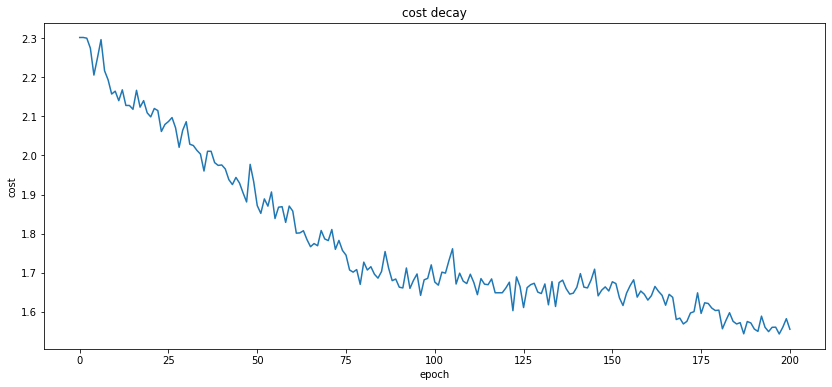

In [ ]:
# loss inicial
for X_batch,y_batch in train_dataloader:
    
    y_pred = model(X_batch.float())
    loss = loss_fn(y_pred, y_batch.float())
    break

loss_list = [loss.item()]
print ("Epoch ",0,"|  loss: ", loss.item())
optimizer.zero_grad() # Zero gradients

for epoch in range(1, epochs+1):
    for X_batch,y_batch in train_dataloader:
        y_pred = model(X_batch.float())            # prediction

        loss = loss_fn(y_pred, y_batch.float())     # loss calculation
        
        optimizer.zero_grad() # Zero gradients
        loss.backward()       # Gradients
        optimizer.step()      # Update

    print ("Epoch ",epoch,"|  loss: ", loss.item())
        
    
    loss_list.append(loss.item())

plt.figure(figsize = (14,6))
plt.title("cost decay")
plt.plot(loss_list)
plt.xlabel("epoch")
plt.ylabel("cost")

### evaluation

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
X_train.shape

(2911, 257, 257)

In [ ]:
with torch.no_grad():
    preds = []

    model.to('cpu')
    for X_sample,y_sample in Dataset_desc(torch.tensor(X_train.reshape(-1,1,257,257)),y_train):
       
        y_pred = model(X_sample.reshape(-1,1,257,257).float())
        y_pred = y_pred.argmax(axis = 1)
        preds.append(y_pred.detach().numpy())
   
    y_pred = np.array(preds)
    
    print(y_pred)
    print("training set")
    print(classification_report(y_train,y_pred))

    print("-"*100)
    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


[[9]
 [0]
 [3]
 ...
 [9]
 [9]
 [9]]
training set
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       312
           1       0.90      0.99      0.94       300
           2       0.60      0.99      0.74       320
           3       0.98      0.98      0.98       244
           4       0.97      0.97      0.97       343
           5       1.00      0.99      0.99       300
           6       0.00      0.00      0.00       254
           7       0.99      0.99      0.99       267
           8       1.00      0.99      1.00       254
           9       1.00      1.00      1.00       317

    accuracy                           0.90      2911
   macro avg       0.84      0.89      0.86      2911
weighted avg       0.84      0.90      0.87      2911

----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
with torch.no_grad():
    
    y_pred = model(torch.tensor(X_test.reshape(-1,1,257,257)))
    y_pred = y_pred.argmax(axis = 1)

    print("test set")
    print(classification_report(y_test,y_pred))

    print("-"*100)
    

test set
              precision    recall  f1-score   support

           0       0.75      0.86      0.80       104
           1       0.89      0.92      0.90       166
           2       0.67      0.90      0.77        94
           3       0.99      0.89      0.93        96
           4       0.81      0.74      0.77       120
           5       0.93      0.86      0.89        43
           6       0.00      0.00      0.00        34
           7       0.88      0.96      0.92        84
           8       0.97      0.99      0.98        91
           9       1.00      0.95      0.97        79

    accuracy                           0.86       911
   macro avg       0.79      0.81      0.79       911
weighted avg       0.84      0.86      0.85       911

----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted s

In [ ]:
np.unique(y_train,return_counts = 1)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([312, 300, 320, 244, 343, 300, 254, 267, 254, 317]))

## BatchNorm

### treino

In [ ]:
train_dataloader = DataLoader(Dataset_desc(torch.tensor(X_train.reshape(-1,1,257,257 )),
                                           F.one_hot(torch.tensor(y_train).long())
                                           ),
                            batch_size = 512,
                            shuffle=True)
test_dataloader  = DataLoader(Dataset_desc(torch.tensor(X_test.reshape(-1,1,257,257 )),
                                            F.one_hot(torch.tensor(y_test).long()))
                             )

In [ ]:
num_classes = 10

In [ ]:
model = BigNet_batch(num_classes)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.CrossEntropyLoss()
epochs = 200



In [ ]:
if torch.cuda.is_available():
    model.to('cuda')

In [ ]:
# loss inicial
for X_batch,y_batch in train_dataloader:
    
    y_pred = model(X_batch.float())
    loss = loss_fn(y_pred, y_batch.float())
    break

loss_list = [loss.item()]
print ("Epoch ",0,"|  loss: ", loss.item())
optimizer.zero_grad() # Zero gradients

for epoch in range(1, epochs+1):
    for X_batch,y_batch in train_dataloader:
        y_pred = model(X_batch.float())            # prediction

        loss = loss_fn(y_pred, y_batch.float())     # loss calculation
        
        optimizer.zero_grad() # Zero gradients
        loss.backward()       # Gradients
        optimizer.step()      # Update

    print ("Epoch ",epoch,"|  loss: ", loss.item())
        
    
    loss_list.append(loss.item())

plt.figure(figsize = (14,6))
plt.title("cost decay")
plt.plot(loss_list)
plt.xlabel("epoch")
plt.ylabel("cost")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:64: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch  0 |  loss:  2.3054163455963135
Epoch  1 |  loss:  2.2989540100097656
Epoch  2 |  loss:  2.28641939163208
Epoch  3 |  loss:  2.2189106941223145
Epoch  4 |  loss:  2.1636085510253906
Epoch  5 |  loss:  2.0637340545654297
Epoch  6 |  loss:  2.1021127700805664
Epoch  7 |  loss:  2.087275981903076
Epoch  8 |  loss:  2.1005074977874756
Epoch  9 |  loss:  2.0772287845611572
Epoch  10 |  loss:  2.0420868396759033
Epoch  11 |  loss:  2.0038158893585205
Epoch  12 |  loss:  1.9667093753814697
Epoch  13 |  loss:  2.008646011352539
Epoch  14 |  loss:  1.9216609001159668
Epoch  15 |  loss:  1.8438756465911865
Epoch  16 |  loss:  1.8668150901794434
Epoch  17 |  loss:  1.8946284055709839
Epoch  18 |  loss:  1.8436328172683716
Epoch  19 |  loss:  1.8730292320251465
Epoch  20 |  loss:  1.7913271188735962
Epoch  21 |  loss:  1.6926976442337036
Epoch  22 |  loss:  1.7801679372787476
Epoch  23 |  loss:  1.7522388696670532
Epoch  24 |  loss:  1.7472320795059204
Epoch  25 |  loss:  1.7367782592773438


### evaluation

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
X_train.shape

(2911, 257, 257)

In [ ]:
with torch.no_grad():
    preds = []

    model.to('cpu')
    for X_sample,y_sample in Dataset_desc(torch.tensor(X_train.reshape(-1,1,257,257)),y_train):
       
        y_pred = model(X_sample.reshape(-1,1,257,257).float())
        y_pred = y_pred.argmax(axis = 1)
        preds.append(y_pred.detach().numpy())
   
    y_pred = np.array(preds)
    
    print(y_pred)
    print("training set")
    print(classification_report(y_train,y_pred))

    print("-"*100)
    

In [ ]:
with torch.no_grad():
    
    y_pred = model(torch.tensor(X_test.reshape(-1,1,257,257)))
    y_pred = y_pred.argmax(axis = 1)

    print("test set")
    print(classification_report(y_test,y_pred))

    print("-"*100)
    

In [ ]:
np.unique(y_train,return_counts = 1)